# Kapittel 8

In [7]:
# Import
import math
import numpy as np
import matplotlib.pyplot as plt

#Sett skriftstørrelse i plott
plt.rcParams.update({'font.size': 15})

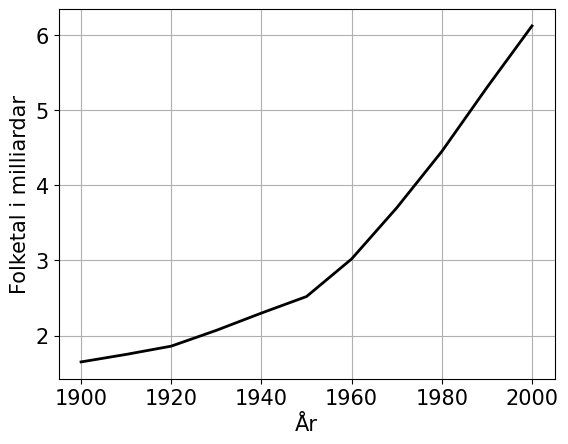

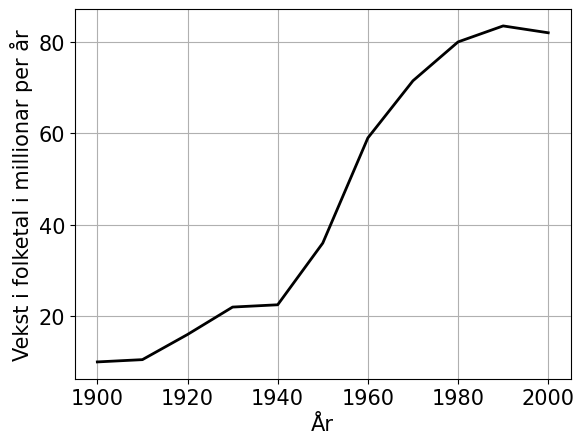

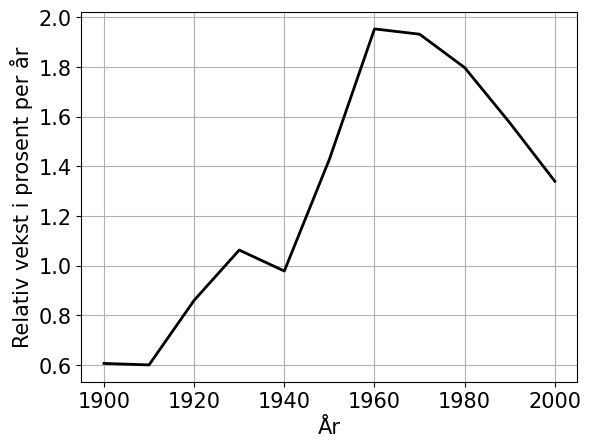

In [8]:
# Skript som lagar plott av folkeveksten på 1900-talet

# Gir vektorar med år og folketal (i milliardar):
h = 10
aar = range(1900, 2001, h)
folk = np.array([1.65, 1.75, 1.86, 2.07, 2.30, 
                 2.52, 3.02, 3.70, 4.45, 5.30, 6.12])

# Plottar folketal
plt.figure(1)
plt.plot(aar, folk, 'k-', linewidth=2)
plt.rcParams.update({'font.size': 15})
plt.xlabel('År')
plt.ylabel('Folketal i milliardar')
plt.grid()
plt.show()

# Reknar ut dei deriverte
folk_deriv = np.zeros(11)         # Allokerar
# For år 1900
folk_deriv[0] = (folk[1]-folk[0])/h
# For åra 1910-1990
for n in range(1, 10):
    folk_deriv[n] = (folk[n+1]-folk[n-1])/(2*h)
# For år 2000
folk_deriv[10] = (folk[10]-folk[9])/h

# Plottar vekstfarten
plt.figure(2)
# Reknar om til millionar/år
plt.plot(aar, folk_deriv*1e3, 'k-', linewidth=2)
plt.rcParams.update({'font.size': 15})
plt.xlabel('År')
plt.ylabel('Vekst i folketal i millionar per år')
plt.grid()
plt.show()

# Plottar relativ vekstfart
plt.figure(3)
plt.plot(aar, folk_deriv/folk*100, 'k-', linewidth=2)
plt.rcParams.update({'font.size': 15})
plt.xlabel('År')
plt.ylabel('Relativ vekst i prosent per år')
plt.grid()
plt.show() 

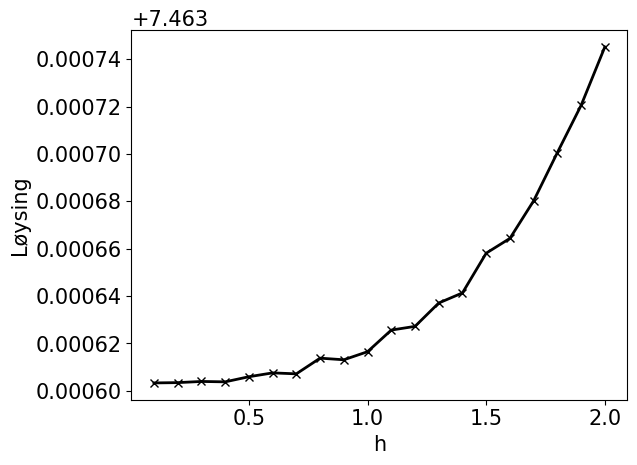

In [10]:
# Skript som bestemmer skjæringspunktet mellom
# eksponentialfunksjonen og gammafunksjonen.
# Til det brukar vi Newtons metode og numerisk derivasjon.
# Skriptet plottar konvergensen av svaret mot h-verdien
# som blir brukt i derivasjonen.

# Gir presisjon og h-verdiane
pres = 1e-5
h_vektor = np.arange(2, 0.0, -0.1)
# Startverdi
x0 = 8

indeks = 0
# Tom vektor med same lengda som h_vektor
svar = np.zeros_like(h_vektor)  

# Bestemmer x ved Newtons metode for kvar av h-verdiane
for h in h_vektor:
    # Initerar x_0 og gamal x-verdi
    x = x0
    x_gml = 10
    while abs(x-x_gml) > pres:
        x_gml = x
        # Den deriverte av gamma
        derivert = (math.gamma(x+h) - math.gamma(x-h))/(2*h)
        # Iterasjonsformel (Newtons metode)
        x = x-(math.gamma(x) - np.exp(x))/ \
            (derivert-np.exp(x))
    svar[indeks] = x
    indeks = indeks+1

# Plottar løysingane som funksjon av h
plt.plot(h_vektor, svar, 'kx-', linewidth=2)
plt.xlabel('h', fontsize = 15)
plt.ylabel('Løysing', fontsize = 15)
plt.show()

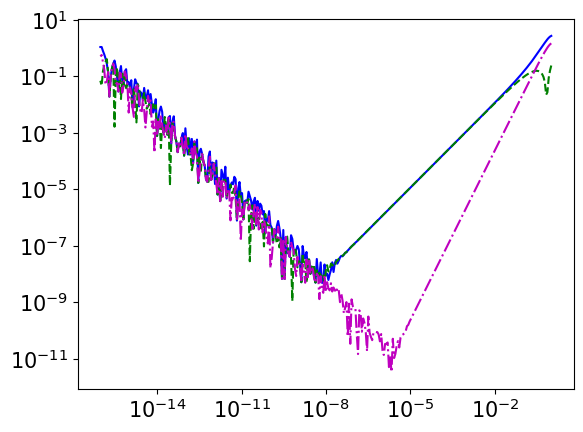

In [19]:
# Skript som plottar feilen i ulike estimat for
# den deriverte.
# Plottet blir laga med logaritmiske aksar.

# Funksjonen - og den eksakte deriverte
def f(x):
    """Funksjonen som skal deriverast"""
    return np.sin(x**2)
    
def f_d(x):
    """Den deriverte"""
    return 2*x*np.cos(x**2)

# Argument-verdi
a = 1

# Eksakt svar
derivert = f_d(a)

# Vektor med ulike steglengder
#h = 0.25**np.arange(1, 8)    # Grov oppdeling
h = 0.9**np.arange(0, 351)    # Fin oppdeling

# Tre estimat: framover-, bakover- og midtpunktsformel
fram_formel = np.abs((f(a+h)-f(a))/h - derivert)
bak_formel = np.abs((f(a)-f(a-h))/h - derivert)
midt_formel = np.abs((f(a+h)-f(a-h))/(2*h) - derivert)

# Plottar feilen
#plt.plot(h, fram_formel, 'b-')
#plt.plot(h, bak_formel, 'g--')
#plt.plot(h, midt_formel, 'm-.')
plt.loglog(h, fram_formel, 'b-')
plt.loglog(h, bak_formel, 'g--')
plt.loglog(h, midt_formel, 'm-.')
plt.show()    